# This notebook will go through integrating/concatenating datasets and basic annotations including cell typing.

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/Lecture6_SpatialTranscriptomics_ImageManip.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Packages

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=eadf01382d02f31ea003c2ecffad11c3bfbbe838e29ad68ce941ebac9a487878
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [3]:
!pip install anndata

In [4]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.1 MB/s eta 0:00:00


## Import packages

Go to scanpy.com if you need help

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

# Reading in and initial data processing

In [6]:
#Downloads the data from online
dat = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")

  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
dat.var_names_make_unique() #makes variables unique in the data
dat.var["mt"] = dat.var_names.str.startswith("MT-") #identifies the mitochondrial genes
sc.pp.calculate_qc_metrics(dat, qc_vars=["mt"], inplace=True) #calculates the classic qc metrics

In [8]:
dat

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
sc.pp.filter_cells(dat, min_counts=5000) #filters minimum and maximum gene count info
sc.pp.filter_cells(dat, max_counts=35000)
dat = dat[dat.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {dat.n_obs}")
sc.pp.filter_genes(dat, min_cells=10)

#cells after MT filter: 3861


In [10]:
sc.pp.normalize_total(dat, inplace=True) #normalize
sc.pp.log1p(dat) #log transform
sc.pp.highly_variable_genes(dat, flavor="seurat", n_top_genes=2000)

In [11]:
sc.pp.pca(dat)
sc.pp.neighbors(dat)
sc.tl.umap(dat)
sc.tl.leiden(dat, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

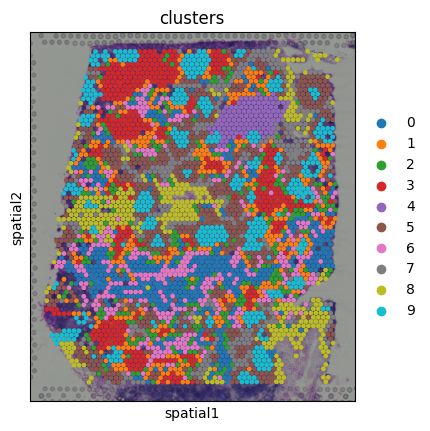

In [12]:
sc.pl.spatial(dat, img_key="hires", color="clusters", size=1.5) #Img_key = None will get rid of background image

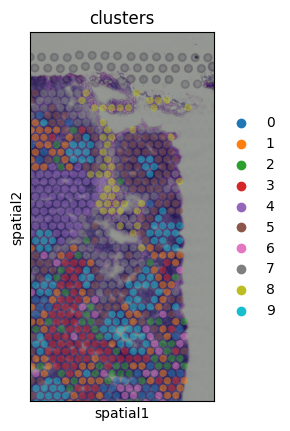

In [13]:
sc.pl.spatial(dat, img_key = 'hires', color = 'clusters', crop_coord = [7000, 10000, 0, 6000], alpha = 0.5, size = 1.3) #On homework. Look up what each of the coordinates mean. Does not correspond to position

Look into scanpy spatial on homework to figure out how to overlay your gene of interest onto plot. Code is not given to us

#Importing Images into Python

In [14]:
!curl -O -J -L https://www.dropbox.com/scl/fi/ch89ctvzmlkxp1lpwi63k/Homework6.png?rlkey=rud80ipa4mmfj2ssmvvkplh6i&dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     14      0  0:00:01  0:00:01 --:--:--    14
100 10.0M  100 10.0M    0     0  6031k      0  0:00:01  0:00:01 --:--:-- 6031k


In [15]:
!pip install opencv-python

In [16]:
from google.colab.patches import cv2_imshow #For Colab
import cv2    #for non-Colab

In [25]:
#read in image file
img = cv2.imread('Homework6.png')

In [26]:
#Shrink image size - keep this the same for colab, original image very large scale
resized_image = cv2.resize(img, (500,500))

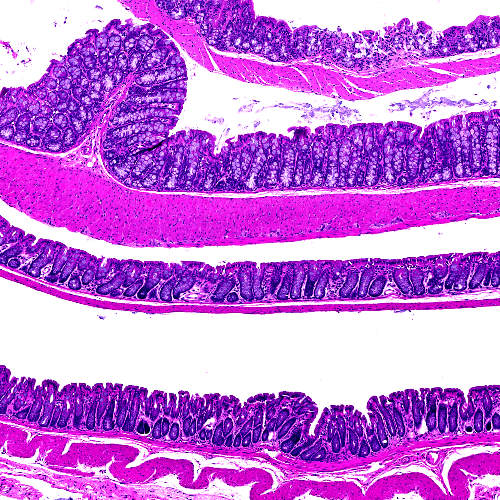

In [27]:
cv2_imshow(resized_image)
#cv2.imshow()    #for non-Colab - will crash Colab kernal

In [33]:
#Rotate the image
rot_image = cv2.rotate(resized_image, cv2.ROTATE_180) #HW will ask you to rotate it a different degree, look at scanpy website

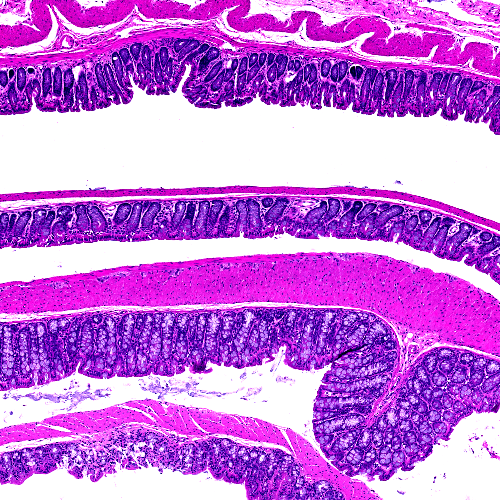

In [34]:
cv2_imshow(rot_image)

In [35]:
#convert the image to a different color - greyscale
grey_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

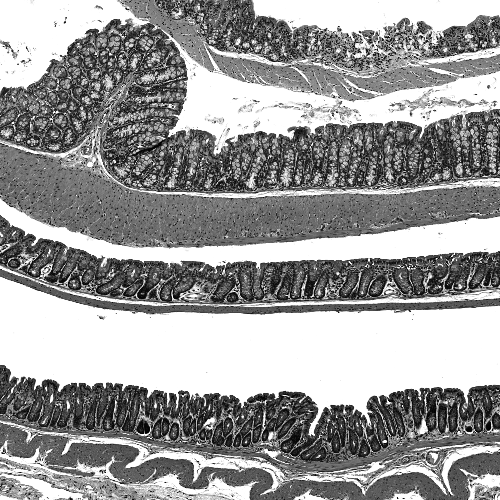

In [23]:
cv2_imshow(grey_img)